<a href="https://colab.research.google.com/github/JPeebles-DataScientist/testrepo/blob/master/PeeblesJ_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Missing values in each column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


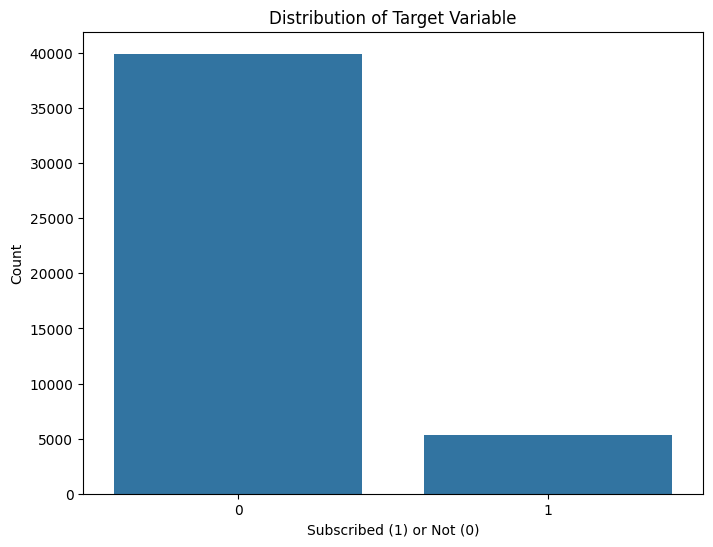

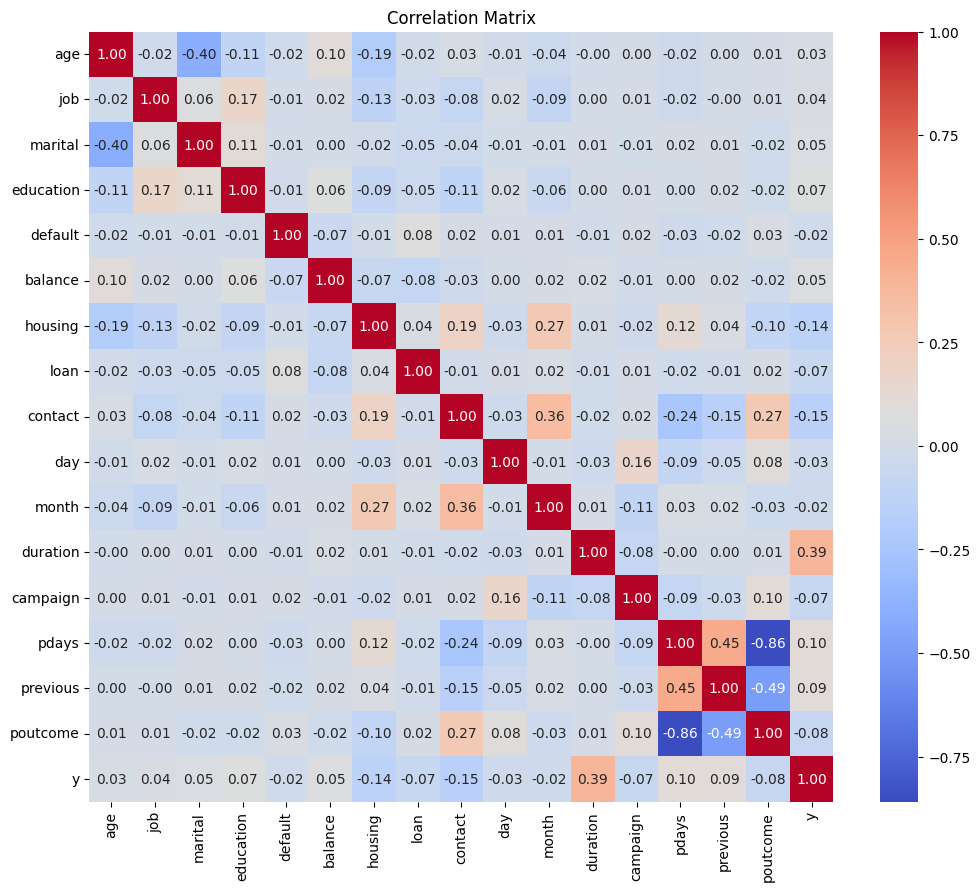

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93      7952
           1       0.48      0.28      0.35      1091

    accuracy                           0.88      9043
   macro avg       0.69      0.62      0.64      9043
weighted avg       0.85      0.88      0.86      9043

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.56      0.19      0.29      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.59      0.61      9043
weighted avg       0.86      0.88      0.86      9043

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7952
           1       0.59      0.40      0.48      1091

    accuracy                           0.89      9043
  

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
file_path = '/content/bank-full.csv'
data = pd.read_csv(file_path, sep=';')

# Display the first few rows of the dataset to understand its structure
data.head()

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Encode categorical variables using LabelEncoder
# This is necessary because machine learning algorithms require numerical input
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split the dataset into features (X) and target variable (y)
# The target variable 'y' is what we want to predict
X = data.drop('y', axis=1)
y = data['y']

# Split the dataset into training and testing sets
# This helps in evaluating the model performance on unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Visualization
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable')
plt.xlabel('Subscribed (1) or Not (0)')
plt.ylabel('Count')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Initialize and train the KNN classifier
# KNN is a simple and intuitive algorithm that classifies based on the majority vote of its neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_report = classification_report(y_test, y_pred_knn)

# Initialize and train the Logistic Regression model
# Logistic Regression is a linear model for binary classification
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_report = classification_report(y_test, y_pred_log_reg)

# Initialize and train the Decision Tree classifier
# Decision Trees split the data into subsets based on the feature values to make predictions
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
decision_tree_report = classification_report(y_test, y_pred_decision_tree)

# Initialize and train the SVM classifier
# SVM finds the hyperplane that best separates the classes in the feature space
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_report = classification_report(y_test, y_pred_svm)

# Display the classification reports for each model
# These reports include metrics such as precision, recall, and F1 score
print("K-Nearest Neighbors Classification Report:\n", knn_report)
print("Logistic Regression Classification Report:\n", log_reg_report)
print("Decision Tree Classification Report:\n", decision_tree_report)
print("Support Vector Machines Classification Report:\n", svm_report)

# Summarize findings and recommendations
print("\n### Findings and Recommendations ###\n")
print("Based on the classification reports, we can compare the models as follows:\n")

# Create a summary table of evaluation metrics
metrics_summary = pd.DataFrame({
    "Model": ["KNN", "Logistic Regression", "Decision Tree", "SVM"],
    "Accuracy": [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_log_reg), accuracy_score(y_test, y_pred_decision_tree), accuracy_score(y_test, y_pred_svm)],
    "Precision": [precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_log_reg), precision_score(y_test, y_pred_decision_tree), precision_score(y_test, y_pred_svm)],
    "Recall": [recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_log_reg), recall_score(y_test, y_pred_decision_tree), recall_score(y_test, y_pred_svm)],
    "F1 Score": [f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_log_reg), f1_score(y_test, y_pred_decision_tree), f1_score(y_test, y_pred_svm)]
})

print(metrics_summary)

print("\n**Actionable Insights:**")
print("- The model with the highest accuracy, precision, recall, and F1 score should be considered for deployment.")
print("- Further tuning of hyperparameters can improve model performance.")
print("- Additional feature engineering and data preprocessing steps might enhance the models' predictive power.")
print("\n**Next Steps and Recommendations:**")
print("- Consider collecting more data to improve model robustness.")
print("- Explore other classification algorithms and ensemble methods for potentially better performance.")
print("- Monitor the deployed model's performance and update it periodically with new data.")
